In [1]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [2]:
# this file contains estimated genetic effects due to GxC for 8,352 pseudo-cells, 213 significant sp-eQTL
filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt"
df = pd.read_csv(filename, sep = "\t", index_col=0)
df.head()
df.shape

(8352, 213)

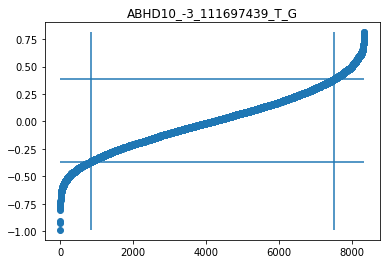

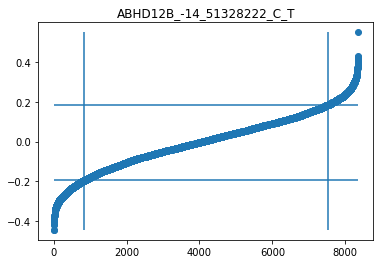

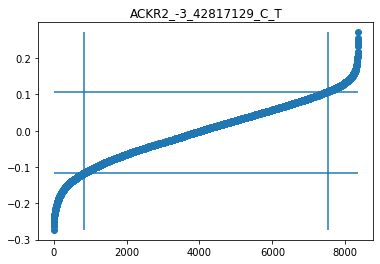

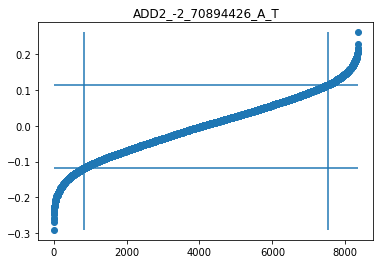

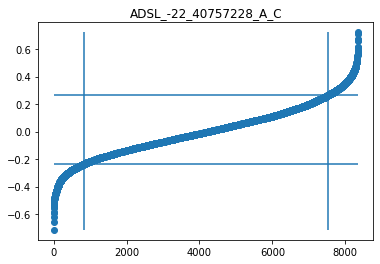

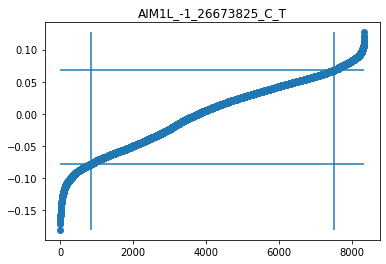

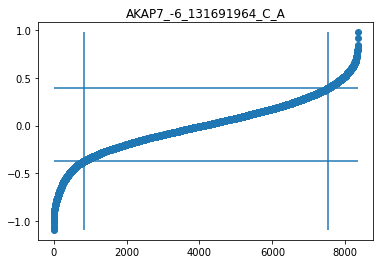

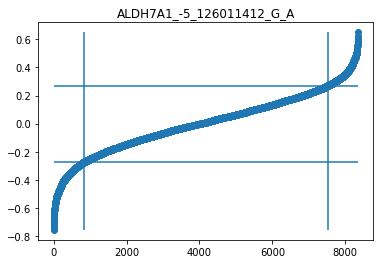

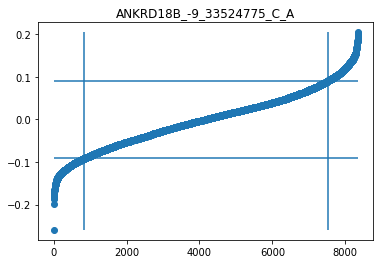

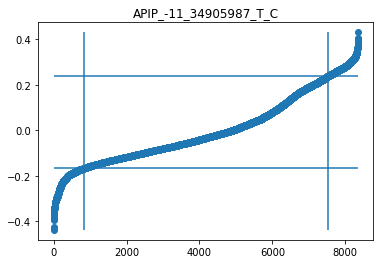

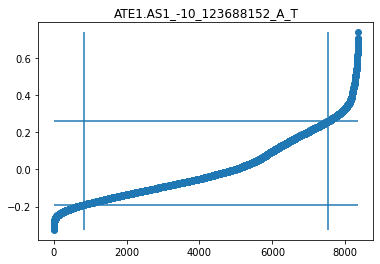

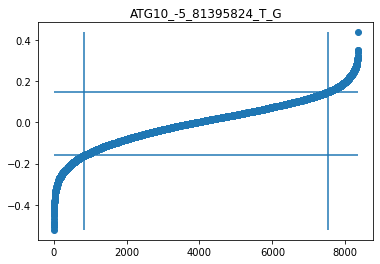

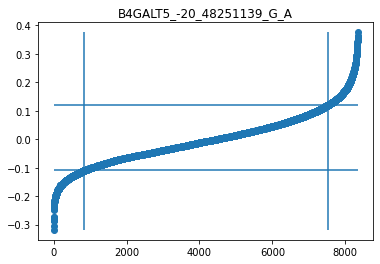

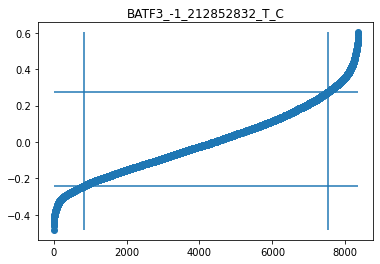

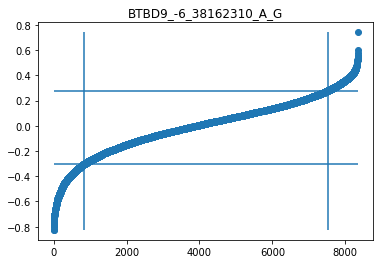

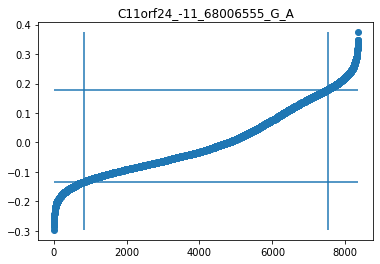

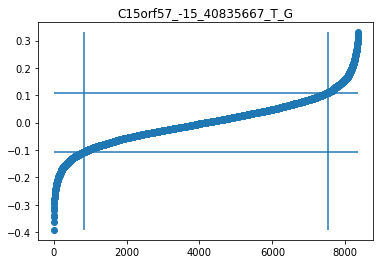

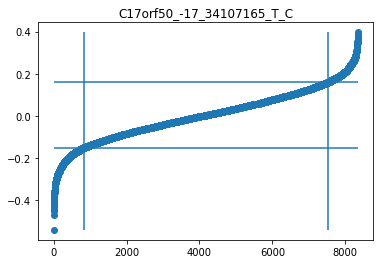

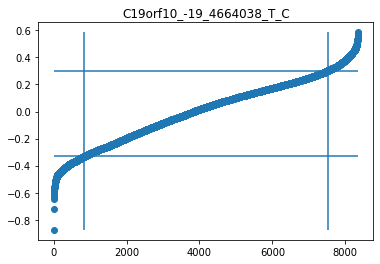

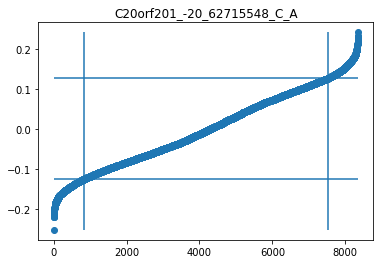

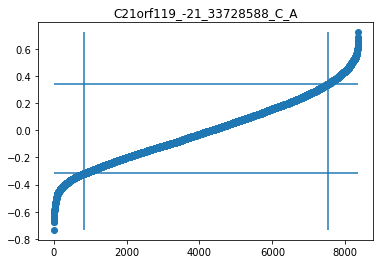

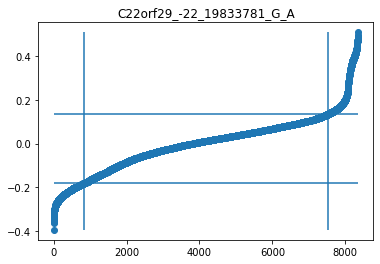

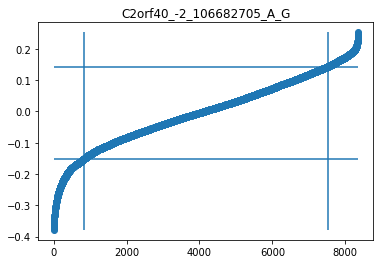

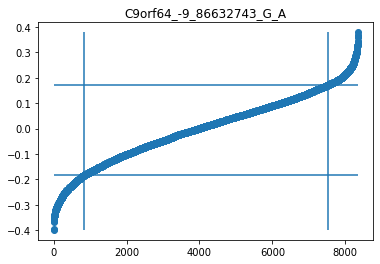

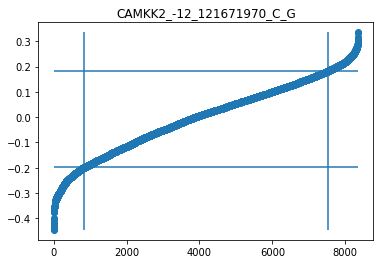

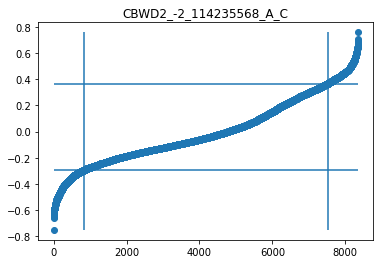

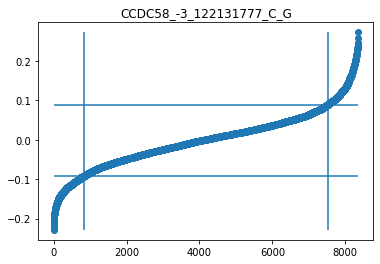

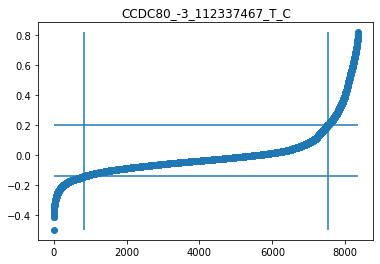

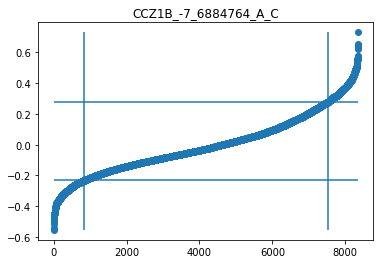

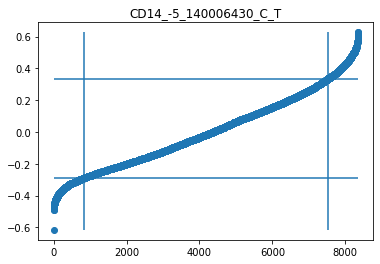

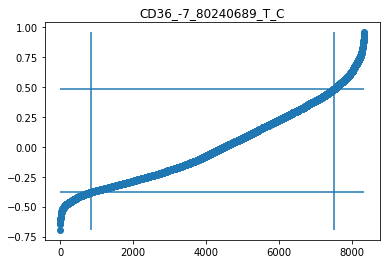

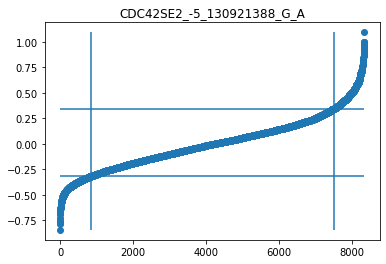

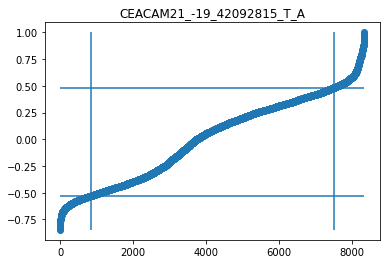

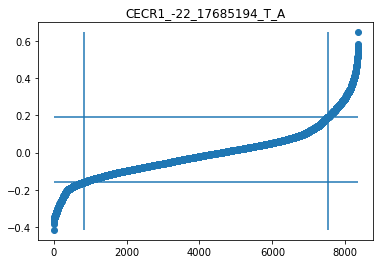

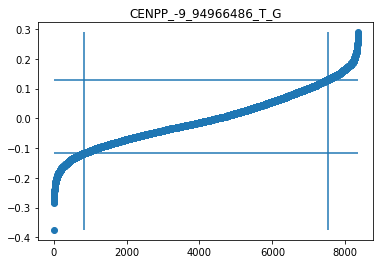

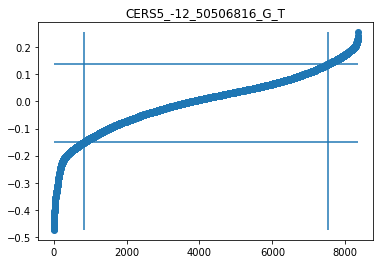

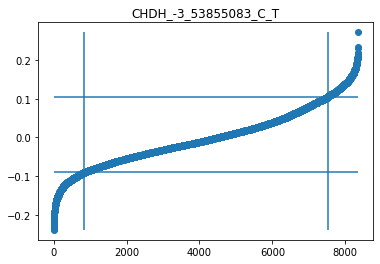

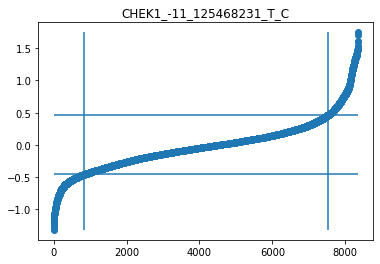

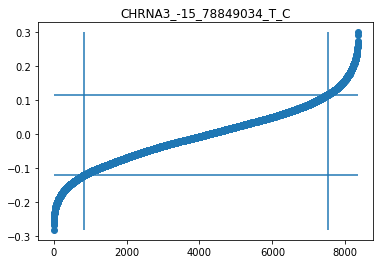

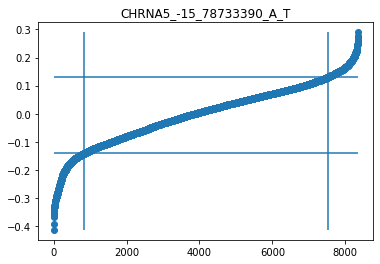

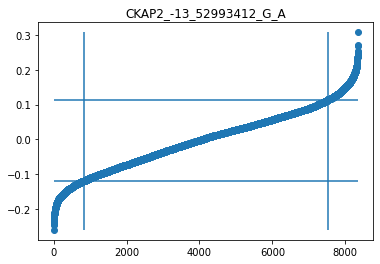

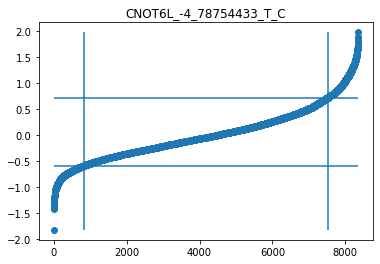

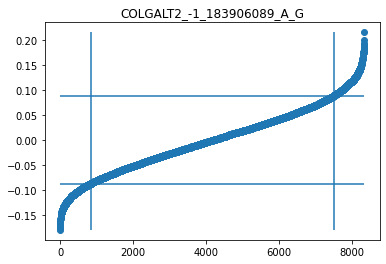

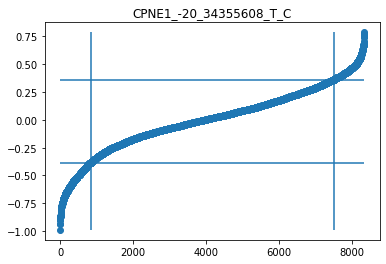

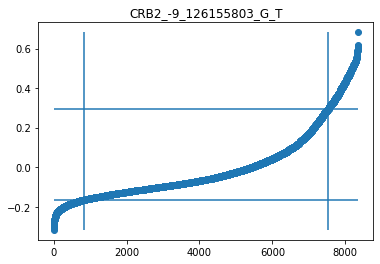

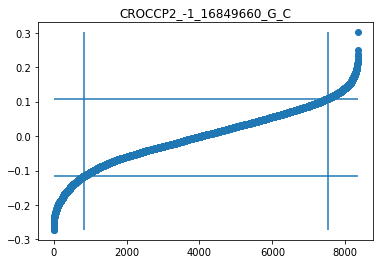

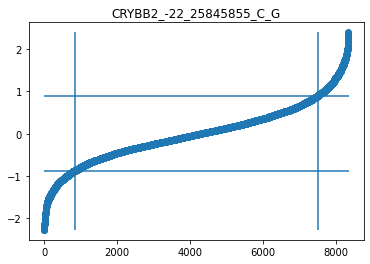

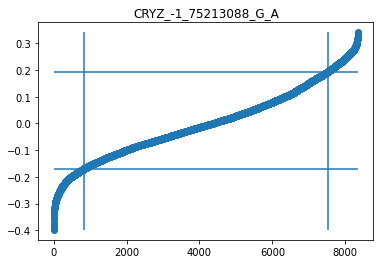

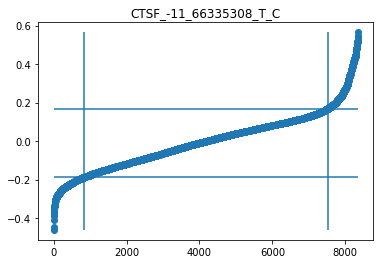

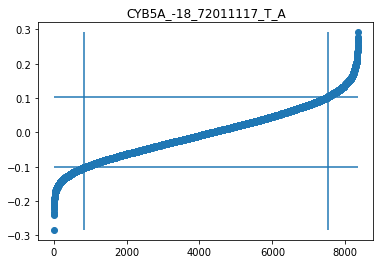

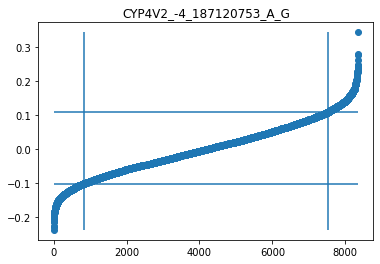

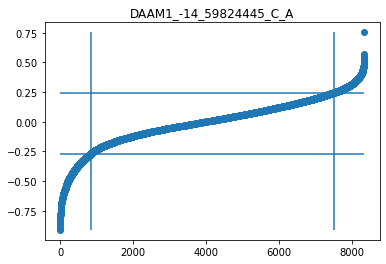

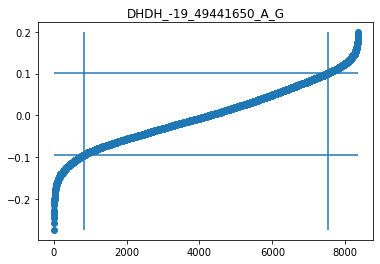

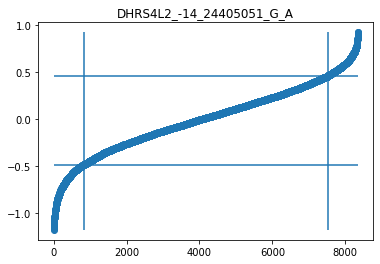

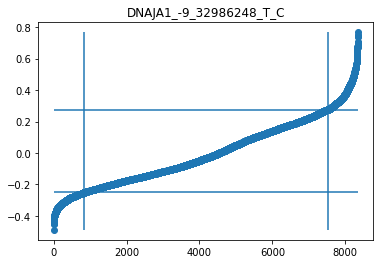

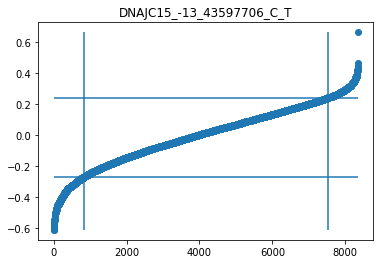

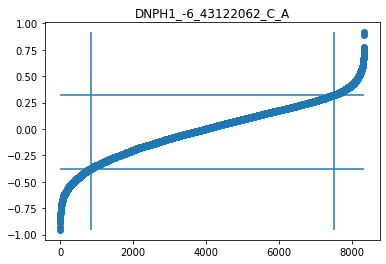

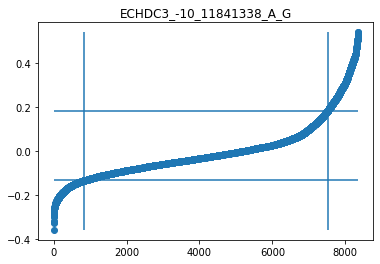

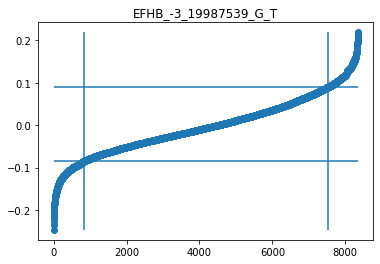

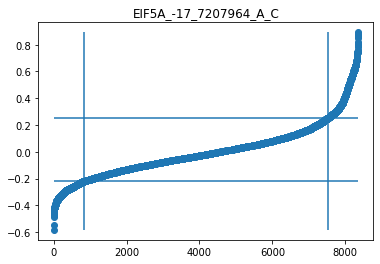

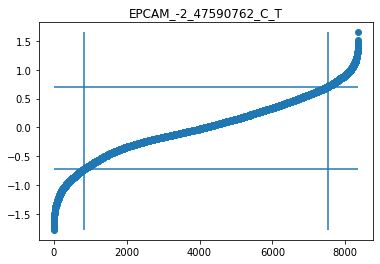

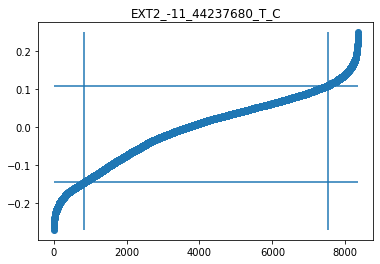

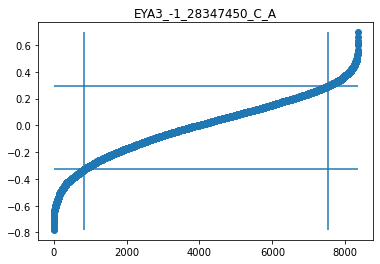

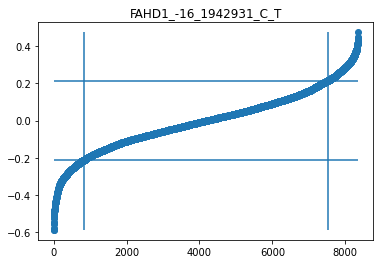

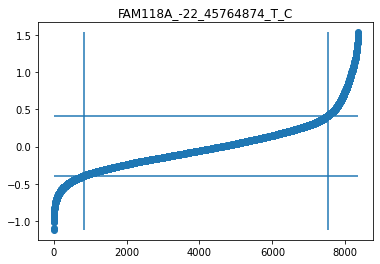

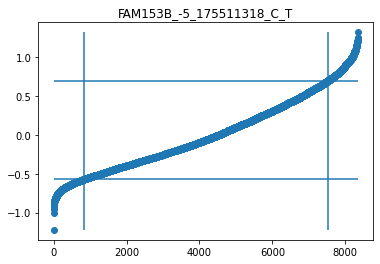

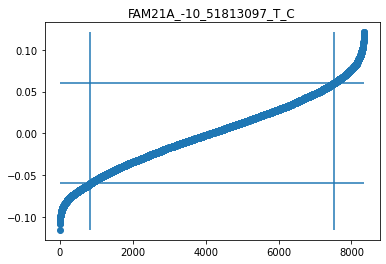

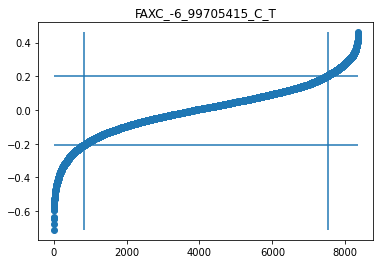

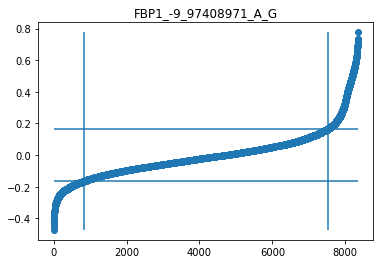

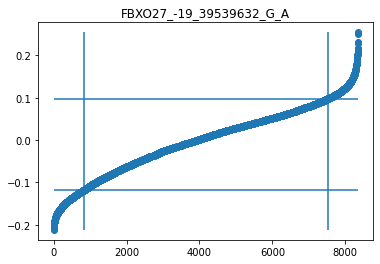

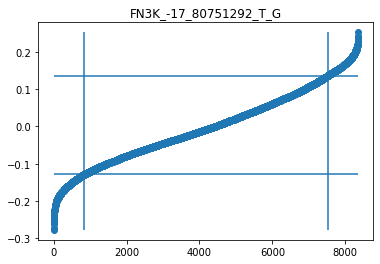

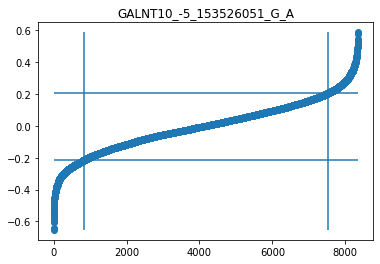

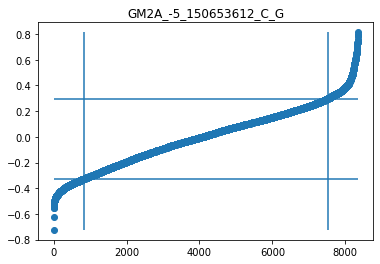

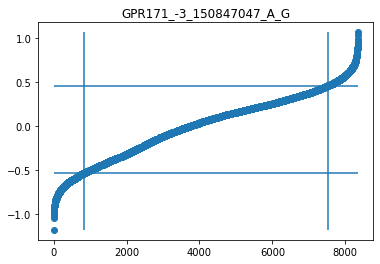

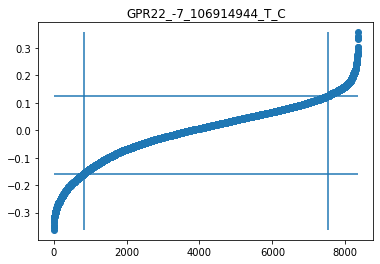

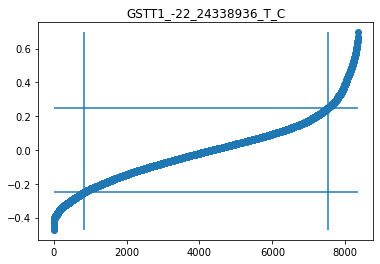

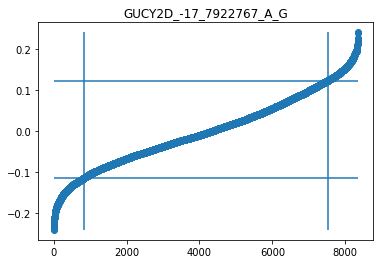

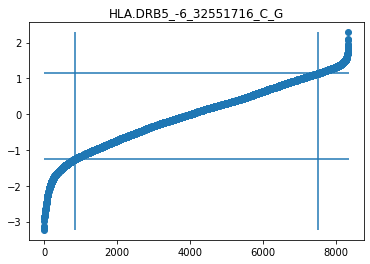

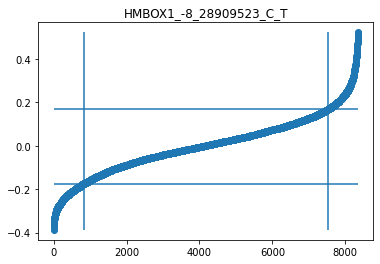

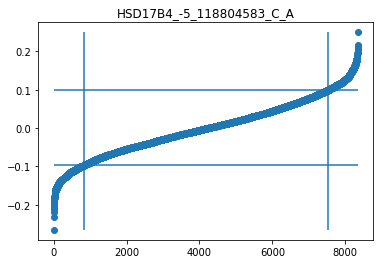

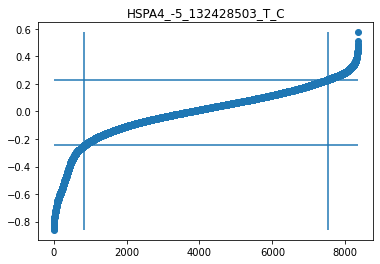

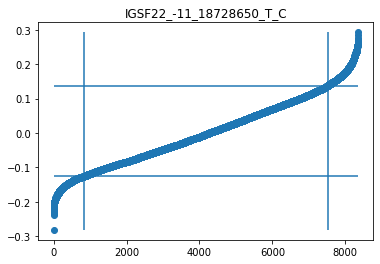

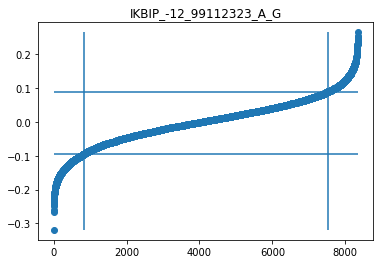

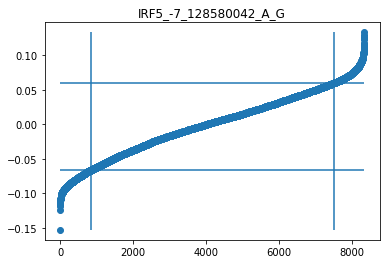

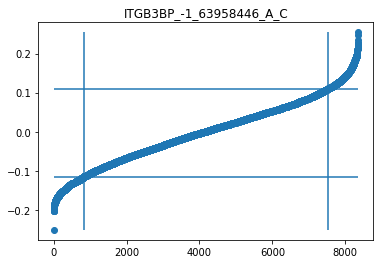

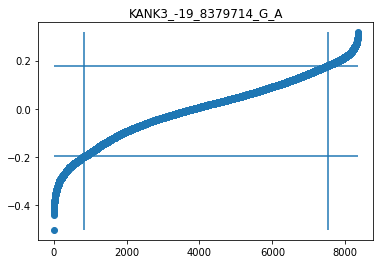

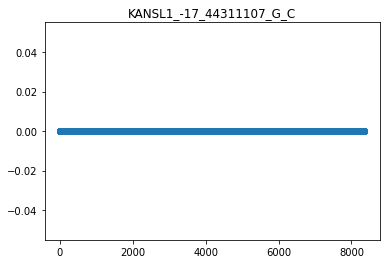

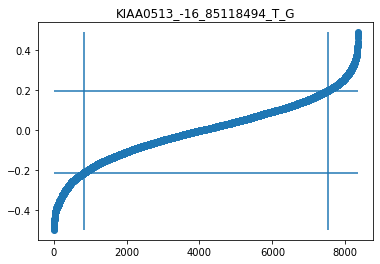

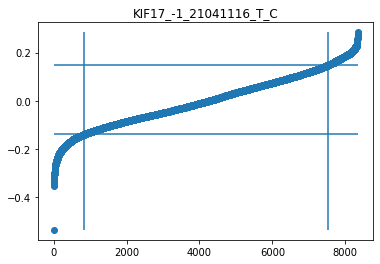

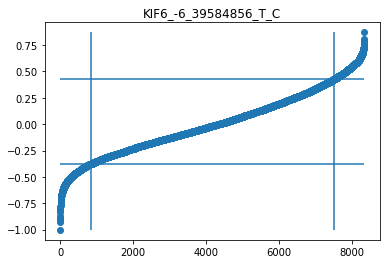

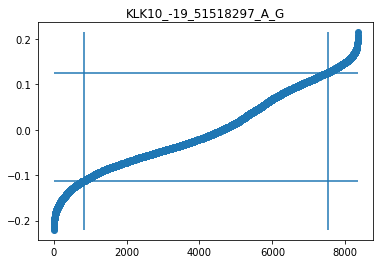

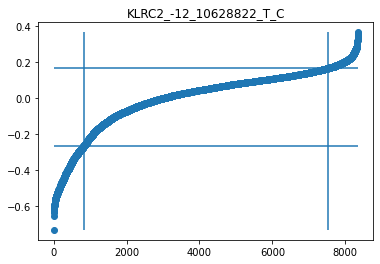

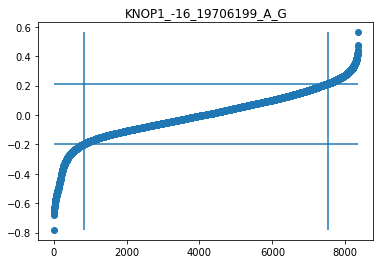

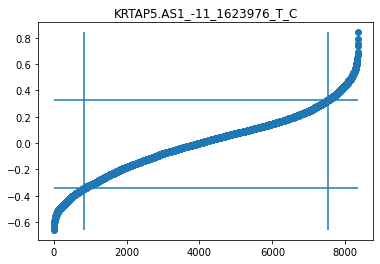

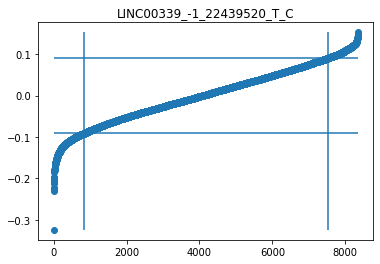

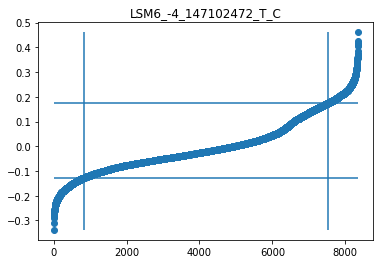

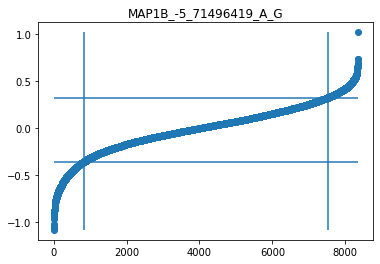

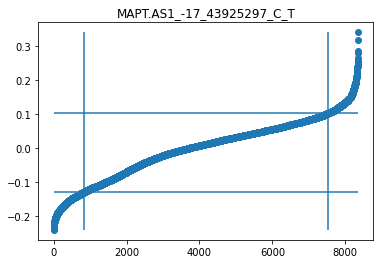

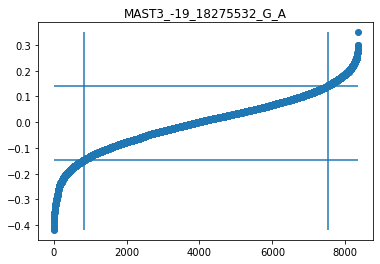

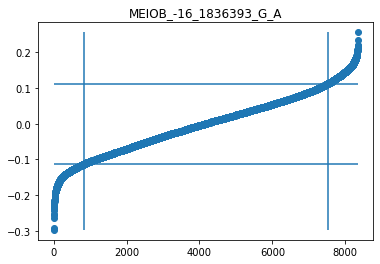

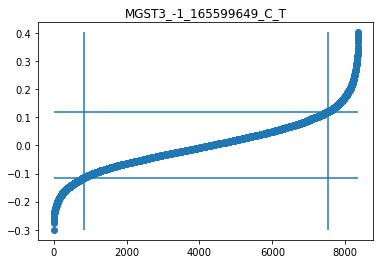

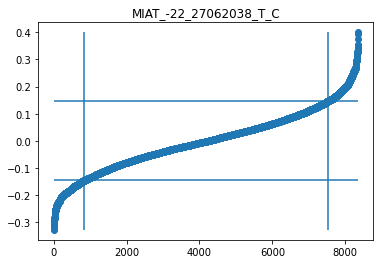

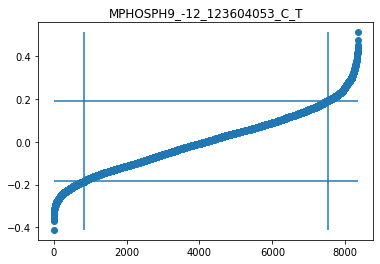

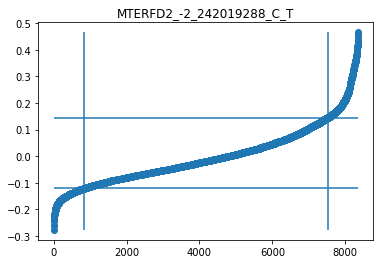

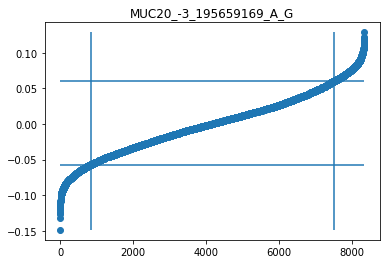

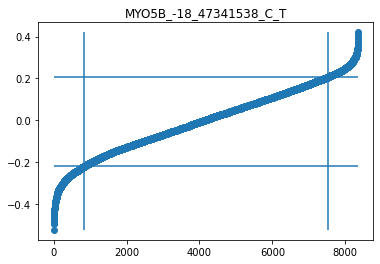

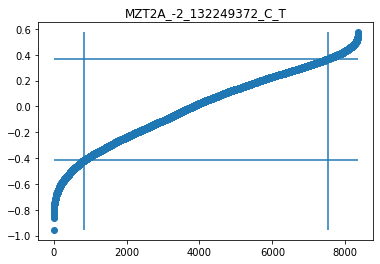

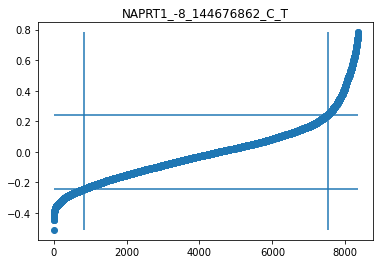

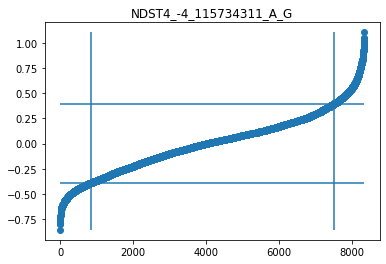

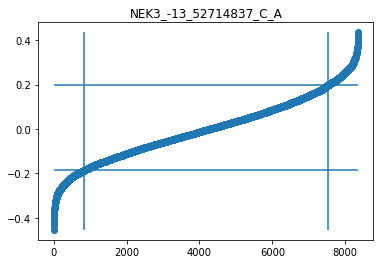

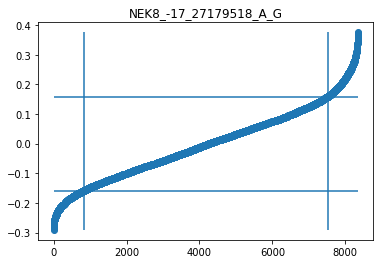

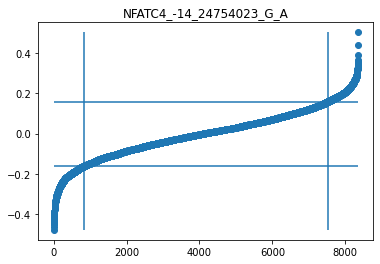

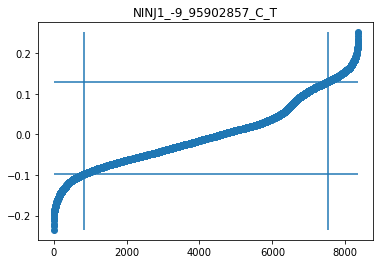

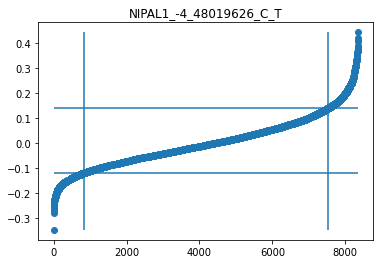

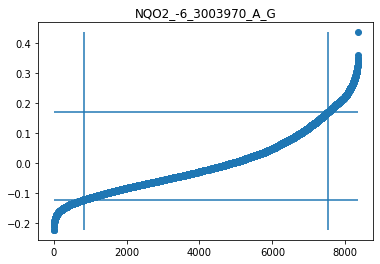

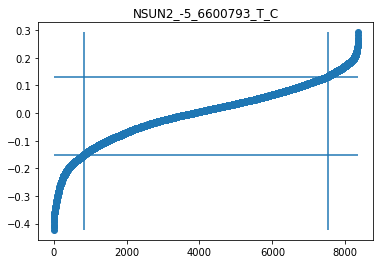

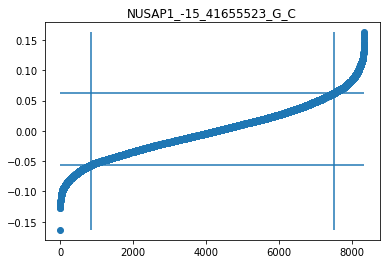

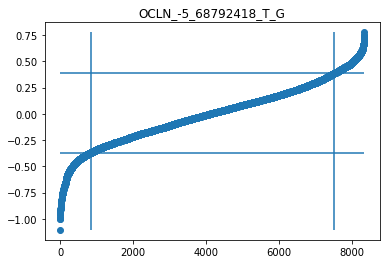

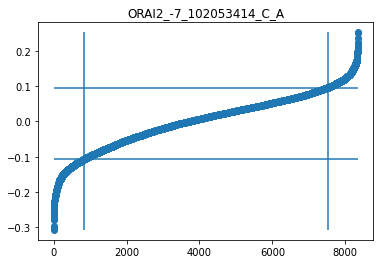

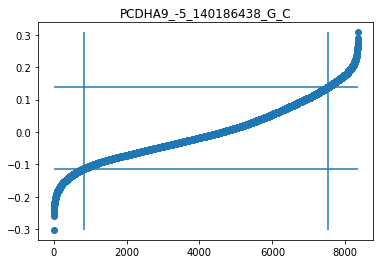

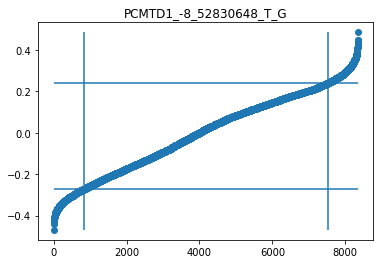

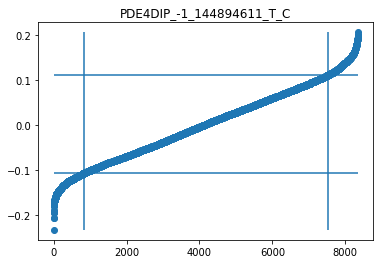

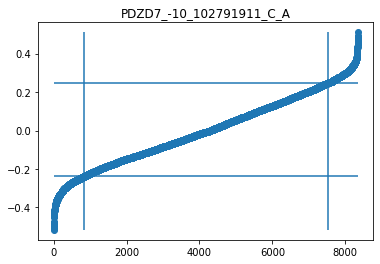

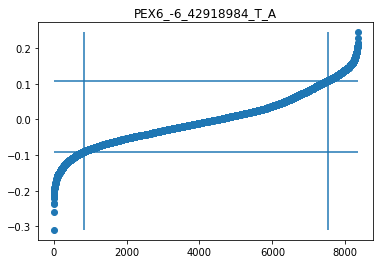

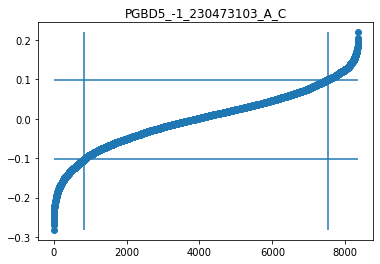

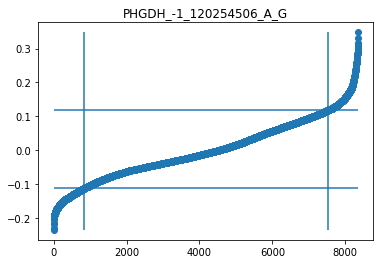

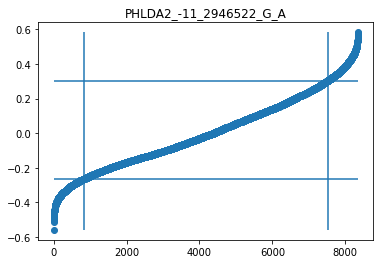

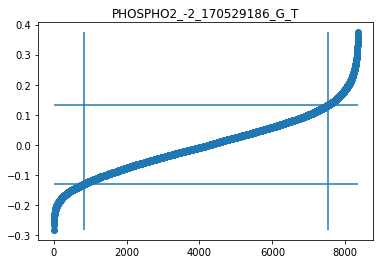

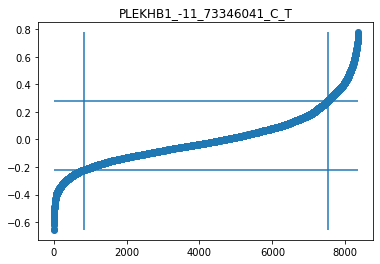

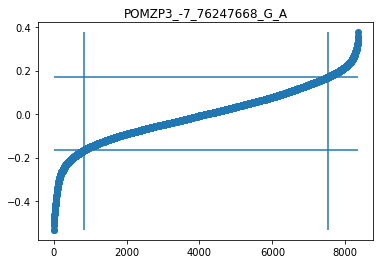

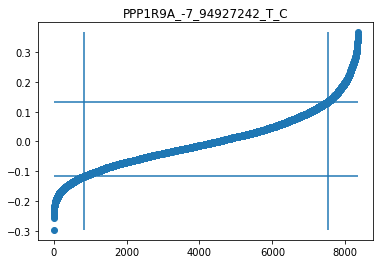

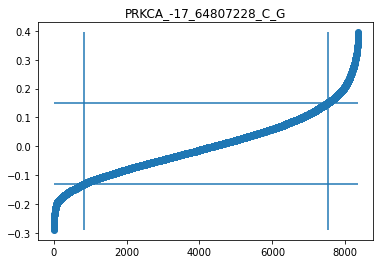

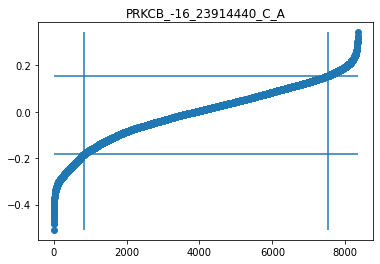

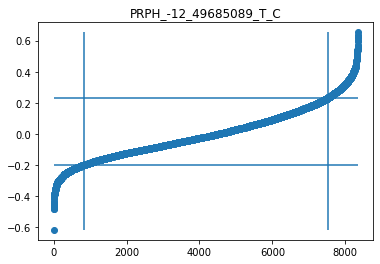

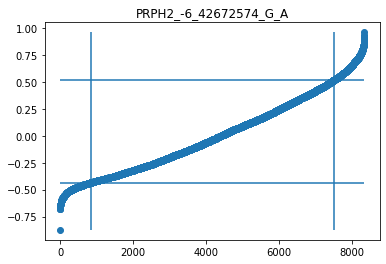

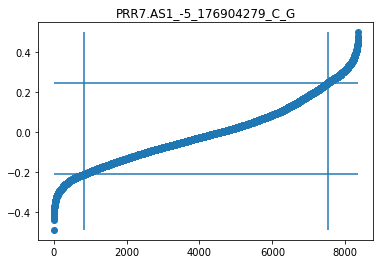

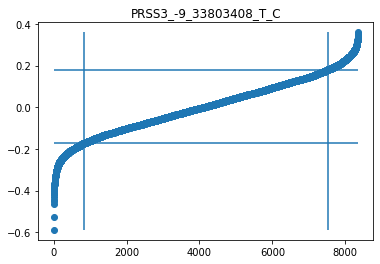

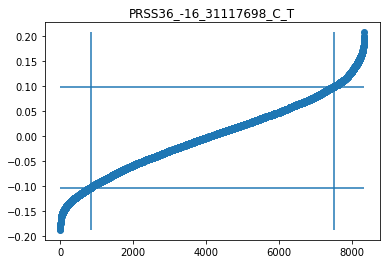

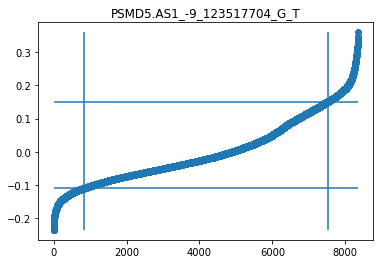

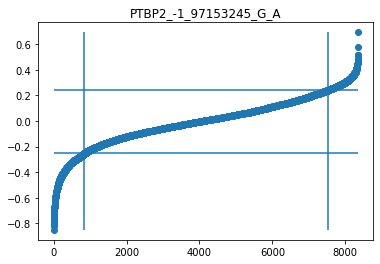

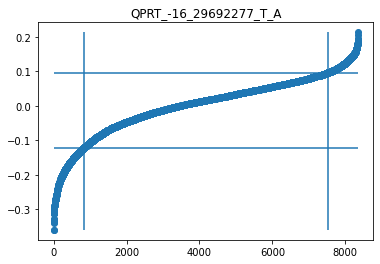

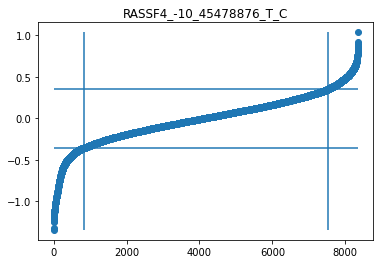

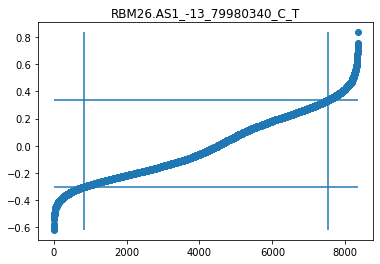

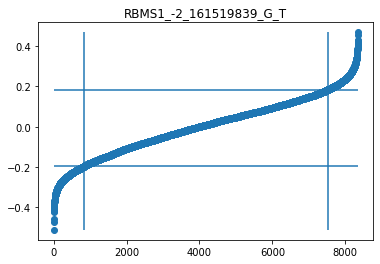

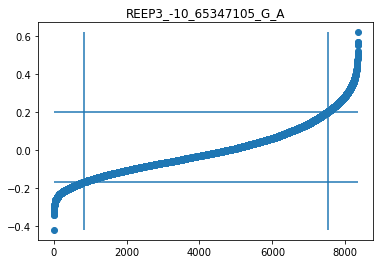

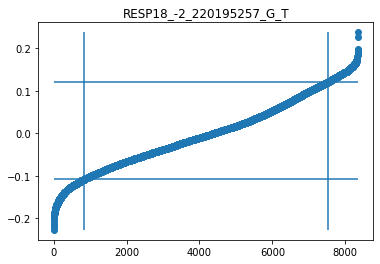

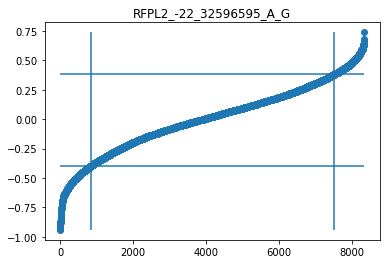

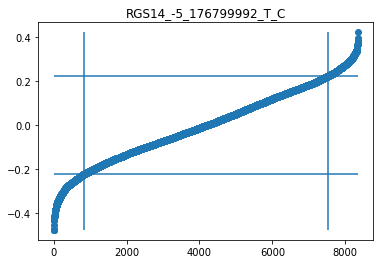

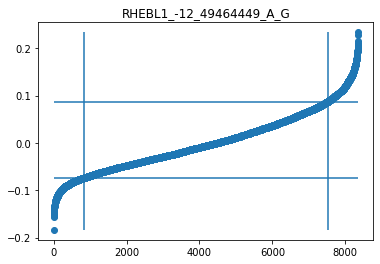

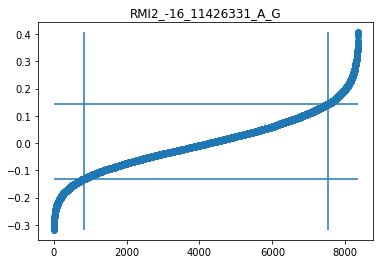

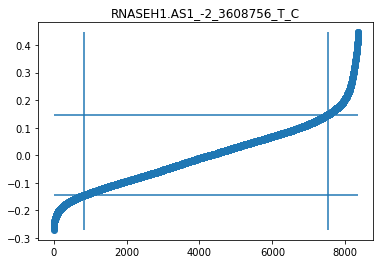

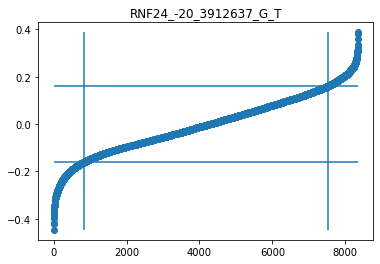

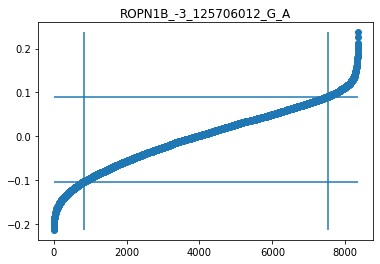

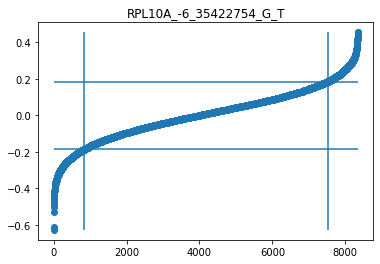

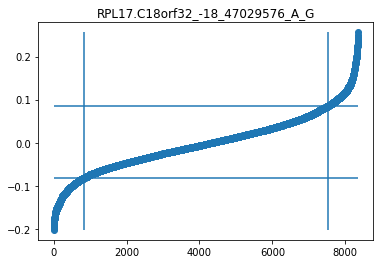

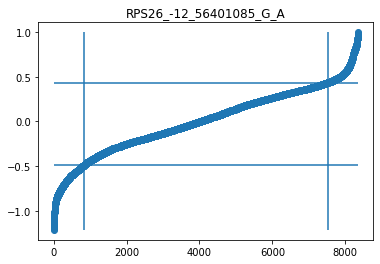

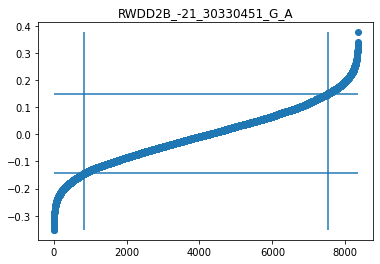

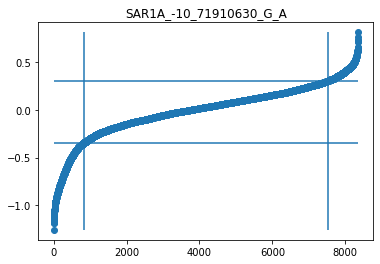

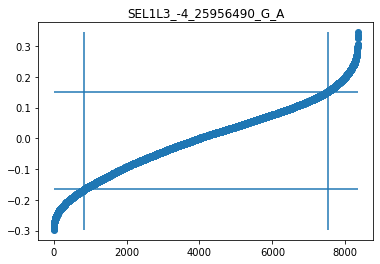

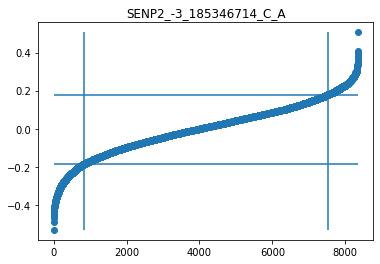

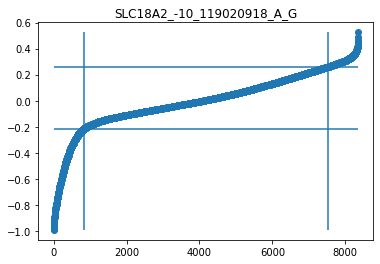

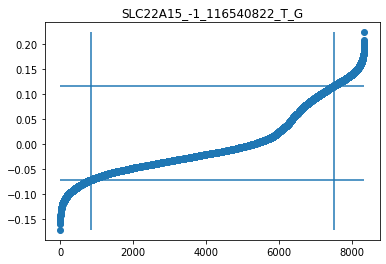

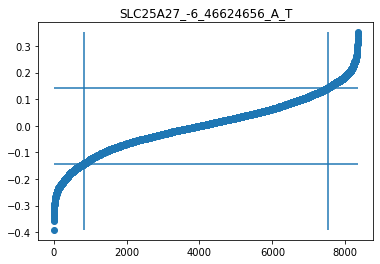

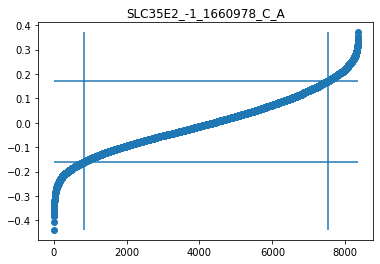

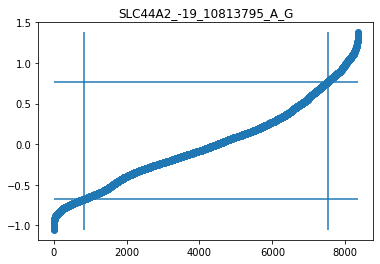

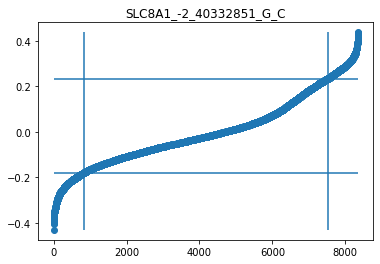

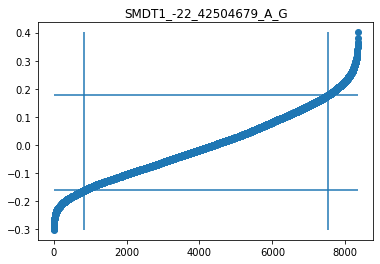

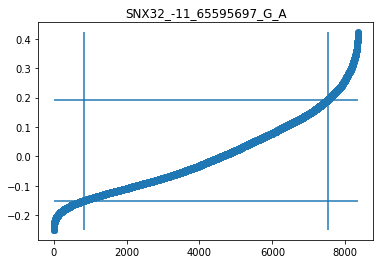

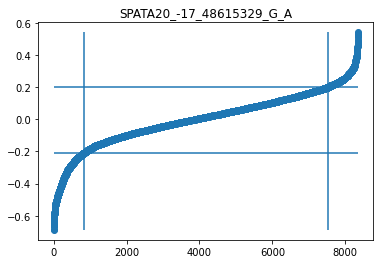

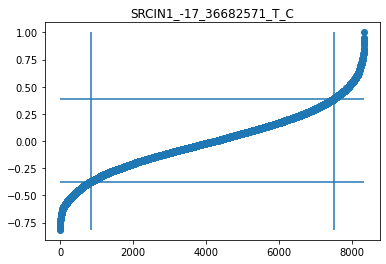

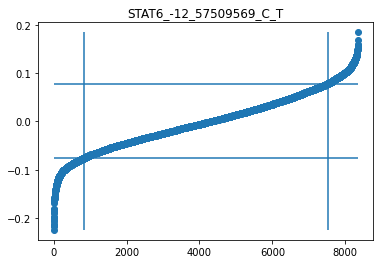

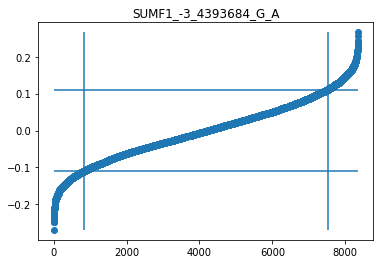

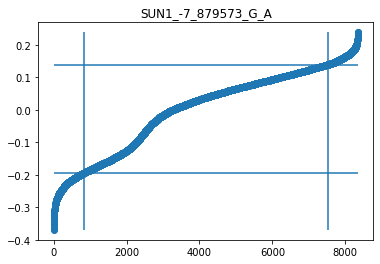

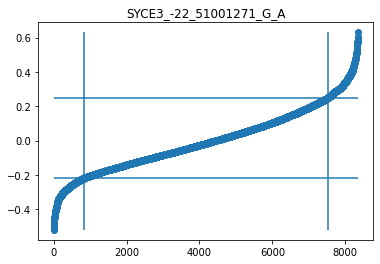

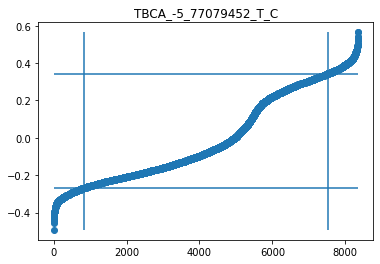

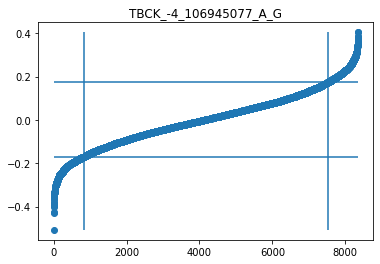

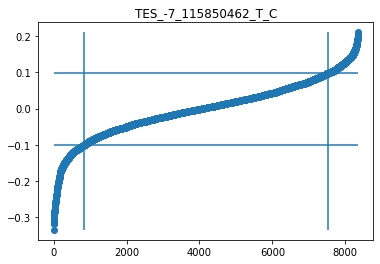

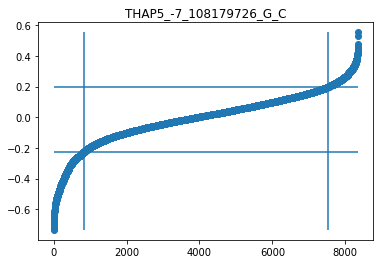

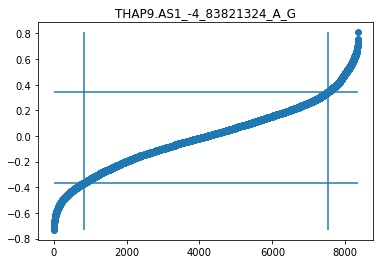

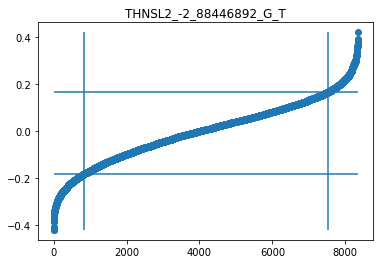

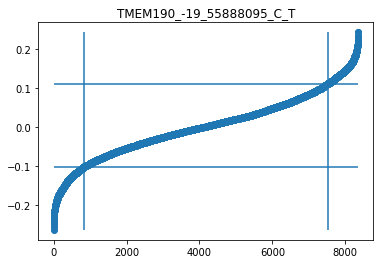

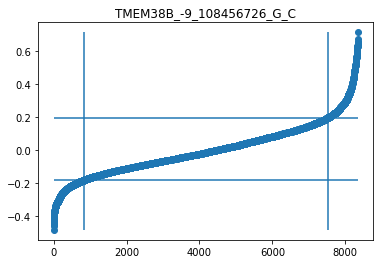

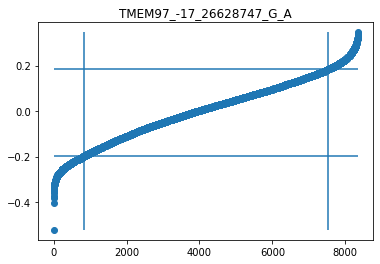

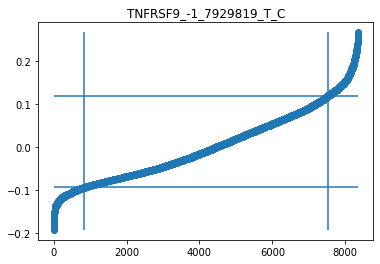

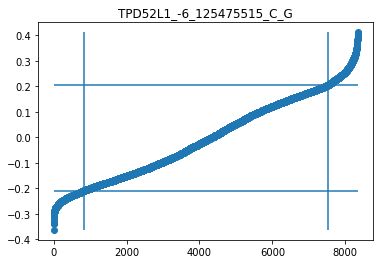

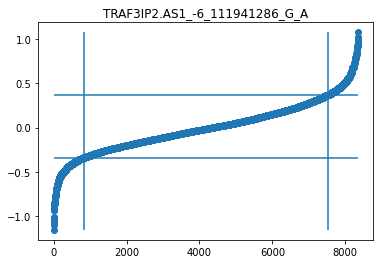

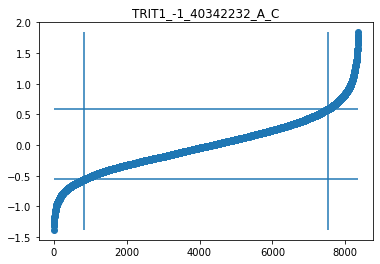

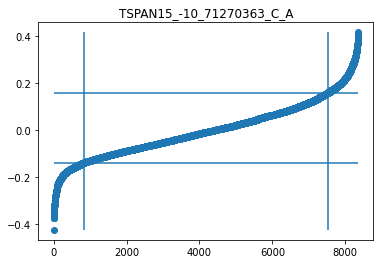

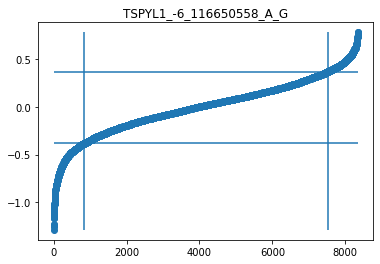

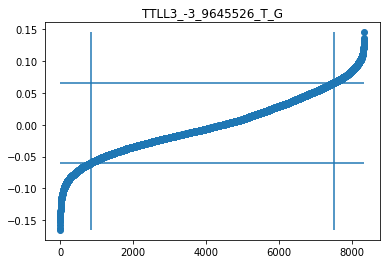

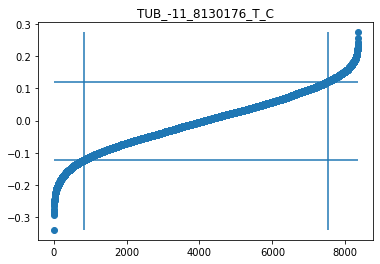

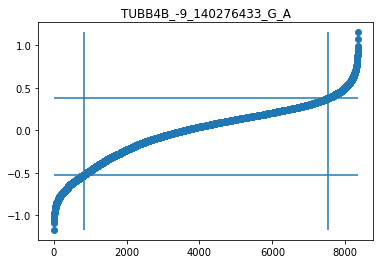

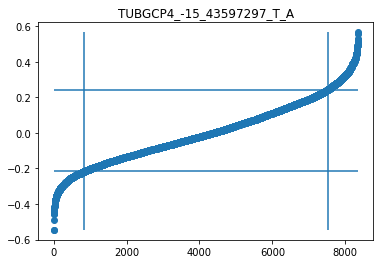

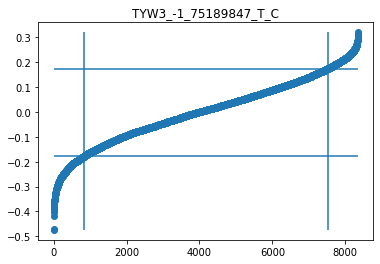

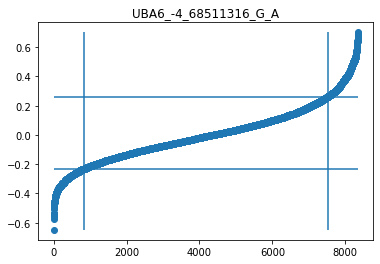

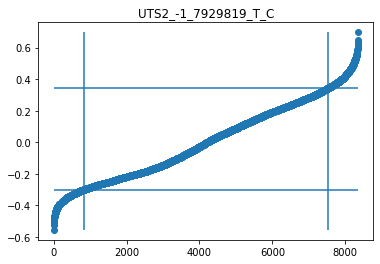

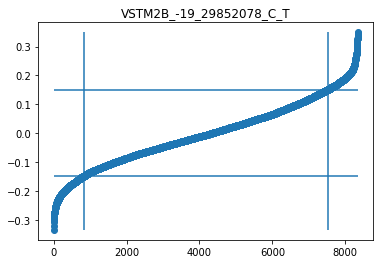

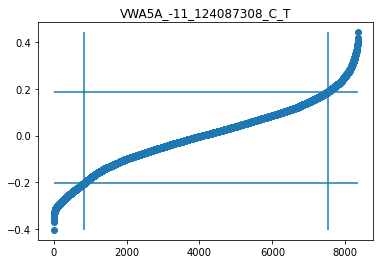

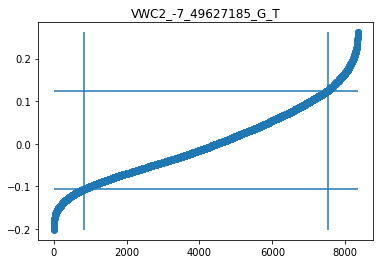

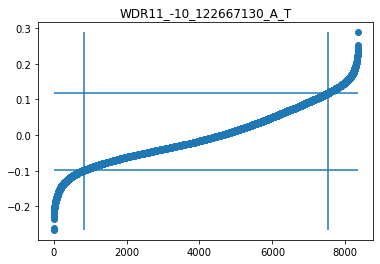

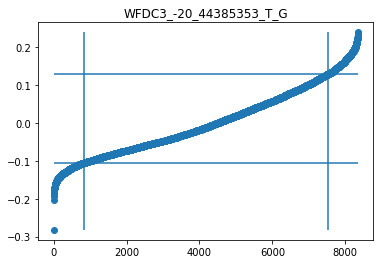

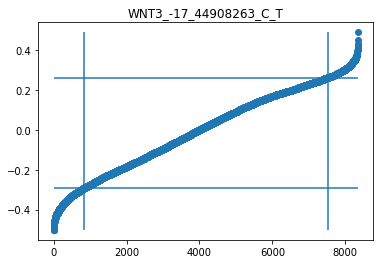

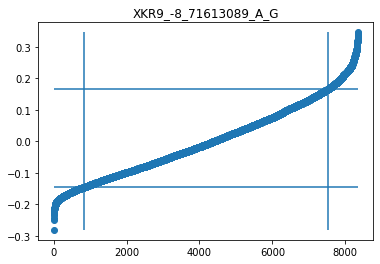

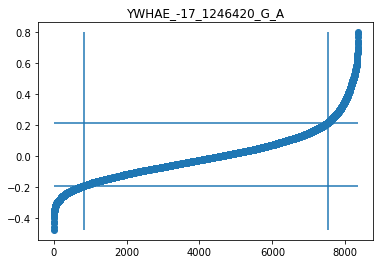

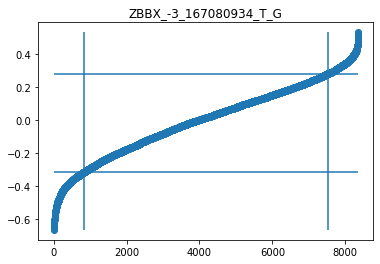

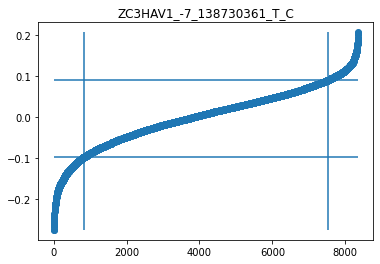

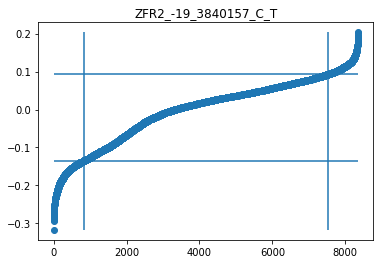

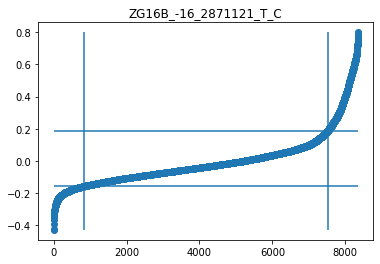

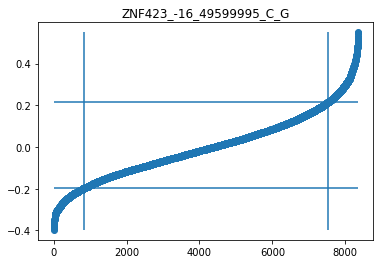

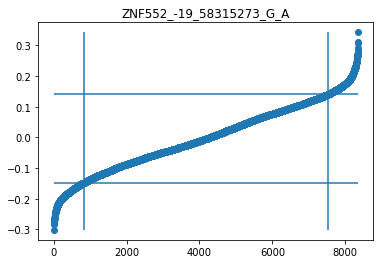

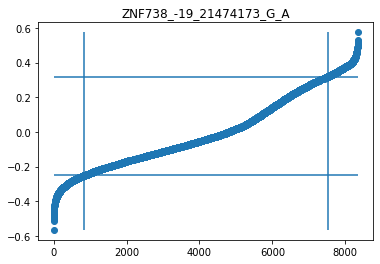

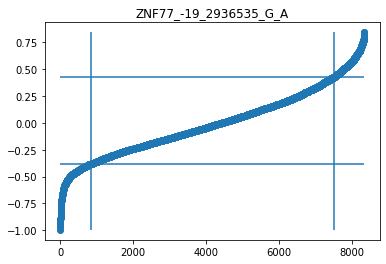

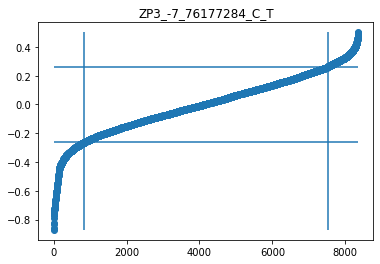

In [3]:
beta = np.array([])
for i in range(df.shape[1]):
# for i in range(5):
    # get single-cell effect sizes
    v = df.values[:,i]
    # get min and max
    ymin = min(v)
    ymax = max(v)
    # rank values
    order = v.argsort()
    y = v[order]
    x = range(len(v))
    plt.scatter(x,y)
    # define 10% of cells
    xx = ceil(0.1*len(v))
    plt.vlines(x=xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[xx],xmin=0, xmax=len(v))
    plt.vlines(x=len(v)-xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[len(v)-xx],xmin=0, xmax=len(v))
    # add title
    plt.title(df.columns.values[i])
    plt.show()
    beta = np.append(beta,y[len(v)-xx]-y[xx])

In [4]:
beta.shape
df.columns.values.shape

(213,)

In [5]:
d = np.concatenate([beta.reshape(beta.shape[0],1),df.columns.values.reshape(beta.shape[0],1)], axis=1)
df_beta = pd.DataFrame(data = d, columns = ["beta","eqtl"])
df_beta.head()

,beta,eqtl
0,0.755937,ABHD10_-3_111697439_T_G
1,0.379461,ABHD12B_-14_51328222_C_T
2,0.22427,ACKR2_-3_42817129_C_T
3,0.231775,ADD2_-2_70894426_A_T
4,0.497657,ADSL_-22_40757228_A_C


In [6]:
# magnitude of GxC effects per eQTL measured as the difference between the 10 and 90 percentiles
df_beta.shape

(213, 2)

In [7]:
# df_beta.to_csv("/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_est_single_GxE_genetic_effects.csv")

In [8]:
max(beta)

2.3994028320953698

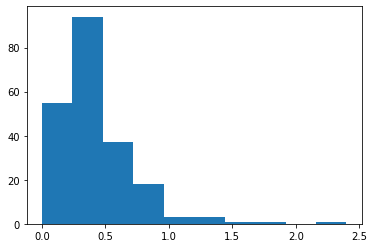

In [9]:
plt.hist(beta)
plt.show()

In [10]:
# beta[beta.argsort()]

In [11]:
df_betas_sel = df_beta[df_beta["beta"]>1]
df_betas_sel

,beta,eqtl
32,1.012861,CEACAM21_-19_42092815_T_A
41,1.310351,CNOT6L_-4_78754433_T_C
46,1.776345,CRYBB2_-22_25845855_C_G
60,1.427423,EPCAM_-2_47590762_C_T
65,1.262619,FAM153B_-5_175511318_C_T
77,2.399403,HLA.DRB5_-6_32551716_C_G
164,1.443384,SLC44A2_-19_10813795_A_G
186,1.143643,TRIT1_-1_40342232_A_C


In [12]:
eqtls = np.array(df_beta["eqtl"])
# eqtls

In [13]:
df = df.loc[:,eqtls]
df.shape

(8352, 213)

In [14]:
### MOFA
# pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_logcounts_model_factors.csv"
pcs_filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_tsne.csv"
df_pcs = pd.read_csv(pcs_filename, index_col=0)
df_pcs.head()
# df_pcs.index

,tSNE1,tSNE2,condition
HPSI0714i-iudw_1--DA--d30--0,-13.756691,32.711906,d30
HPSI0714i-iudw_1--DA--d30--1,4.620292,31.437191,d30
HPSI0714i-iudw_1--DA--d30--2,-0.272890,38.266757,d30
HPSI0714i-iudw_1--DA--d30--3,-8.273758,33.398629,d30
HPSI0714i-iudw_1--DA--d30--4,29.712093,20.151987,d30


In [15]:
# tSNE coordinates for 9,219 pseudocells
df_pcs.shape

(9219, 3)

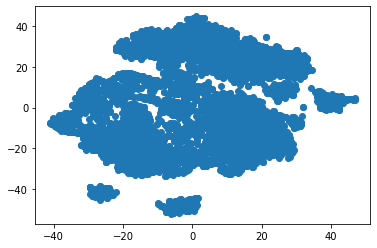

In [16]:
plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1])
plt.show()

In [17]:
## consider only shared cells

In [18]:
all_cells = df_pcs.index.values

In [19]:
## sample 50% of cells

In [20]:
# cells = sample(list(all_cells), k = ceil(len(all_cells)*1))
cells = all_cells
cells = sorted(set(list(df.index.values)).intersection(cells))

In [21]:
df = df[df.index.isin(cells)]
df.shape

(8352, 213)

In [22]:
df_pcs = df_pcs[df_pcs.index.isin(cells)]
df_pcs.shape

(8352, 3)

In [23]:
# sort to ensure cells are in the same order
df = df.sort_index(axis=0)
df_pcs = df_pcs.sort_index(axis=0)

In [24]:
# scale values
mat = minmax_scale(df)
df = pd.DataFrame(data = mat, index = df.index, columns = df.columns)

In [25]:
df.head()

,ABHD10_-3_111697439_T_G,ABHD12B_-14_51328222_C_T,ACKR2_-3_42817129_C_T,ADD2_-2_70894426_A_T,ADSL_-22_40757228_A_C,AIM1L_-1_26673825_C_T,AKAP7_-6_131691964_C_A,ALDH7A1_-5_126011412_G_A,ANKRD18B_-9_33524775_C_A,APIP_-11_34905987_T_C,...,YWHAE_-17_1246420_G_A,ZBBX_-3_167080934_T_G,ZC3HAV1_-7_138730361_T_C,ZFR2_-19_3840157_C_T,ZG16B_-16_2871121_T_C,ZNF423_-16_49599995_C_G,ZNF552_-19_58315273_G_A,ZNF738_-19_21474173_G_A,ZNF77_-19_2936535_G_A,ZP3_-7_76177284_C_T
HPSI0114i-bezi_3--DA--d30--0,0.448688,0.249393,0.706757,0.404445,0.302548,0.662406,0.490010,0.488772,0.325266,0.422088,...,0.255249,0.791551,0.497890,0.774453,0.177908,0.300723,0.775047,0.749362,0.463765,0.697824
HPSI0114i-bezi_3--DA--d30--1,0.461211,0.177634,0.751075,0.341468,0.440322,0.598029,0.623504,0.675710,0.324031,0.461235,...,0.306447,0.786650,0.478403,0.715071,0.215323,0.201769,0.763115,0.820694,0.338141,0.721057
HPSI0114i-bezi_3--DA--d30--10,0.540489,0.219479,0.651851,0.389979,0.361615,0.652506,0.491530,0.630615,0.325081,0.546419,...,0.281126,0.721619,0.449763,0.711579,0.225753,0.335539,0.738963,0.740194,0.453506,0.784567
HPSI0114i-bezi_3--DA--d30--11,0.436036,0.290144,0.670284,0.464230,0.418748,0.587199,0.510270,0.547312,0.307339,0.405079,...,0.279400,0.826618,0.573139,0.693413,0.155984,0.330201,0.719690,0.848933,0.400768,0.631148
HPSI0114i-bezi_3--DA--d30--12,0.420933,0.278734,0.731672,0.395058,0.378180,0.575473,0.455227,0.449900,0.288341,0.370932,...,0.387831,0.796648,0.458704,0.703148,0.147486,0.333421,0.785498,0.836974,0.404880,0.591171


In [26]:
### save scaled data

In [27]:
# delect columns that are only 0s
df = df.loc[:, (df != 0).any(axis=0)]

In [28]:
### build "fake" AnnData file
#
# counts: single-cell eQTL effects
# adata.obsm['spatial']: coordinates (PCA, UMAP..)

In [29]:
# obs i.e. cells
obs_names = df.index.values
obs = pd.DataFrame(index=obs_names)
# obs
n_obs = len(obs)
n_obs

8352

In [30]:
# vars i.e. genes (or in this case gene-SNP pairs)
var_names = df.columns.values
var = pd.DataFrame(index=var_names)
# var
n_vars = len(var)
n_vars

212

In [31]:
X = df.to_numpy()
X.shape
type(X)

numpy.ndarray

In [32]:
adata = ad.AnnData(X=X, obs=obs, var=var, dtype='float')
adata

AnnData object with n_obs × n_vars = 8352 × 212

In [33]:
## add PCs as "spatial" coordinates
adata.obsm['spatial'] = df_pcs.values[:,0:2]
adata.obsm['spatial'].shape

(8352, 2)

In [34]:
adata

AnnData object with n_obs × n_vars = 8352 × 212
    obsm: 'spatial'

In [35]:
import random
random.seed(0)

In [36]:
sp = spatial_patterns(adata, normalized = True, params=SpatialPatternParameters(lengthscales=5))

In [37]:
d = np.concatenate([sp[0].labels.reshape(len(sp[0].labels),1),
                    adata.var.index.to_numpy().reshape(len(sp[0].labels),1)], axis=1)
df_labels = pd.DataFrame(data = d, columns = ["label","gene"])
df_labels.head()

,label,gene
0,7,ABHD10_-3_111697439_T_G
1,8,ABHD12B_-14_51328222_C_T
2,9,ACKR2_-3_42817129_C_T
3,8,ADD2_-2_70894426_A_T
4,7,ADSL_-22_40757228_A_C


In [38]:
df_pp = pd.DataFrame(data = sp[0].pattern_probabilities, columns = ["pp"+str(i) for i in np.arange(len(np.unique(sp[0].labels)))])
df_pp.head()

,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_cluster_summaries = pd.DataFrame(data = sp[0].patterns, index=df_pcs.index)
df_cluster_summaries.head()
# df_cluster_summaries.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12
HPSI0114i-bezi_3--DA--d30--0,-0.388097,-0.212855,0.800770,0.147607,0.305947,-0.582662,-0.001746,-0.844155,-0.684614,0.942302,0.604032,-0.255478,-0.444638
HPSI0114i-bezi_3--DA--d30--1,-0.550234,-0.160669,0.910911,0.175574,0.279173,-0.675222,-0.081372,-0.998008,-0.632150,1.108243,0.483928,-0.319362,-0.489306
HPSI0114i-bezi_3--DA--d30--10,-0.695811,-0.130974,0.786067,0.402712,0.139129,-0.572550,0.475520,-0.730413,-0.893655,1.089400,0.583408,-0.142639,-0.478181
HPSI0114i-bezi_3--DA--d30--11,-0.417983,-0.237848,0.805299,0.165402,0.237171,-0.574898,-0.202941,-0.811331,-0.537400,0.827773,0.419941,-0.286875,-0.393175
HPSI0114i-bezi_3--DA--d30--12,-0.421990,-0.240442,0.792881,0.182612,0.213301,-0.563732,-0.211449,-0.785746,-0.526760,0.797599,0.386089,-0.281504,-0.379203


In [40]:
# df_cluster_summaries.to_csv("/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_summaries.csv")

In [41]:
df_clusters = pd.concat([df_labels, df_pp], axis = 1)
df_clusters.head()

,label,gene,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12
0,7,ABHD10_-3_111697439_T_G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,8,ABHD12B_-14_51328222_C_T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,9,ACKR2_-3_42817129_C_T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8,ADD2_-2_70894426_A_T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,7,ADSL_-22_40757228_A_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# df_clusters.to_csv("/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_labels.csv")

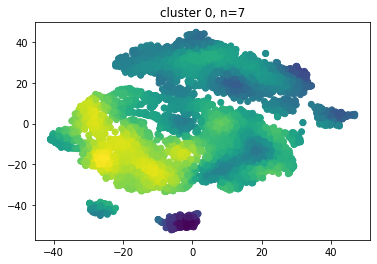

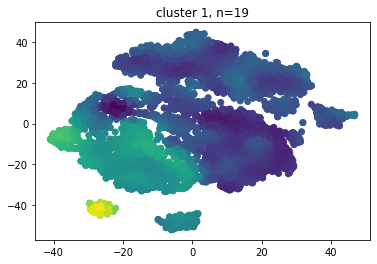

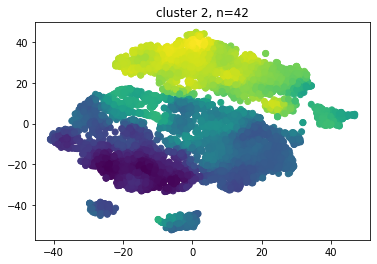

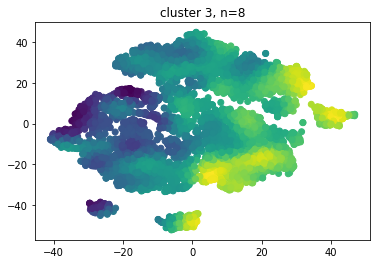

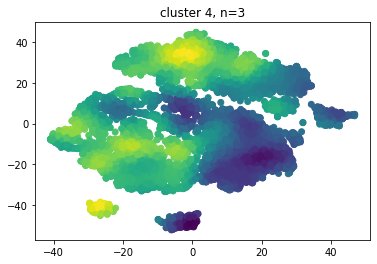

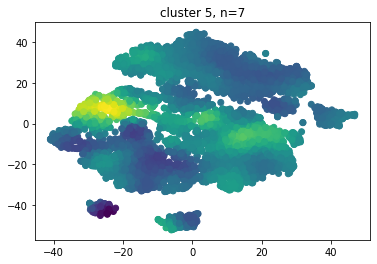

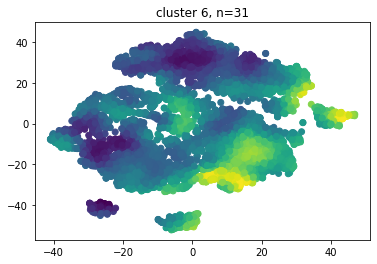

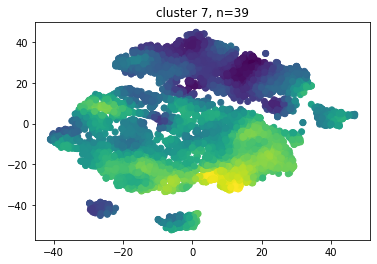

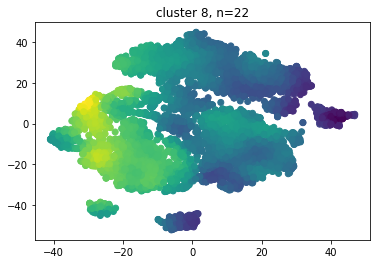

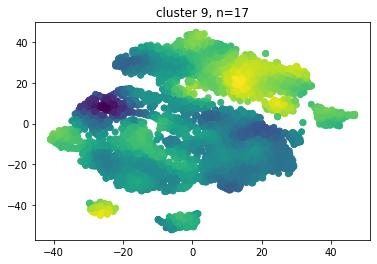

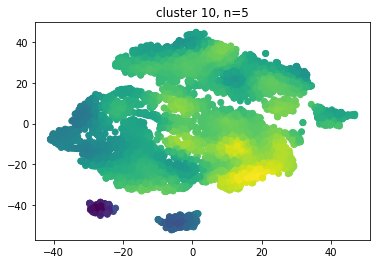

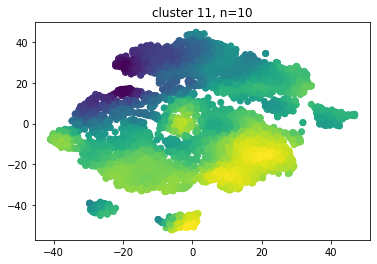

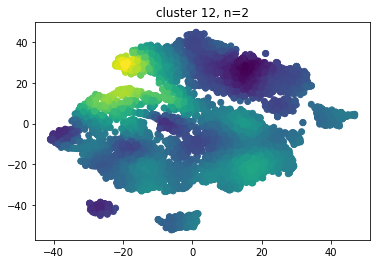

In [43]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()